# Welcome to the Minecraft Group Project!

## <ins>Introduction</ins>
Due to COVID-19 and the strict lockdown policies imposed in many countries, a huge surge of gamers was observed in 2020, with the numbers racing up to 2.7 billion. Many studies have been conducted on how gamers play video games and how video games can affect an individual’s well-being, cognitive performance and brain activity ([Johannes et al., 2021](https://doi.org/10.1098/rsos.202049); [Jordan & Dhamala, 2022](https://doi.org/10.1016/j.ynirp.2022.100112)).

Despite the global increase in the number of gamers and the potential advantages associated with video gaming, numerous studies have been hindered by limited sample sizes ([Alonso-Fernández et al., 2019](https://doi.org/10.1016/j.compedu.2019.103612); [Petri & Gresse, 2017](https://doi.org/10.1016/j.compedu.2017.01.004)) and inaccuracies stemming from reliance on self-reported engagement metrics ([Johannes et al., 2021](https://doi.org/10.1098/rsos.202049)). Addressing these critical issues, a team of computer scientists from the University of British Columbia, known as PLAICraft, has developed a study that automates data collection during players' gaming sessions in Minecraft. This approach alleviates concerns related to self-evaluation. Furthermore, PLAICraft aims to identify specific player types that are likely to generate a greater volume of data based on previous datasets, which will serve as the central focus of this paper. Specifically, this paper will investigate what gender is likely to contribute more data based on the K-NN classification model based on the Age and Total Playtime of the players.

The dataset being used in this study, derived from `players.csv` (courtesy of PLAICraft team; [here](https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz)), contains a total of 196 observations and nine variables. These variables include:

**Name and Type of Variables**
* There are nine variables that are of mixed data types:
  1.  Experience (`chr`)
  2.  Subscribe (`lgl`)
  3.  Hashed Email (`chr`)
  4.  Played Hours (`dbl`)
  5.  Name (`chr`)
  6.  Gender (`chr`)
  7.  Age (`dbl`)
  8.  Individual ID (`chr`)
  9.  Organization Name (`chr`)

**Variable meanings:**
* Meaning includes:
    1. Experience → self-evaluated experience with Minecraft
    2. Subscribe → declarations to receive email updates
    3. Hashed Email → encrypted email via Hash
    4. Played Hours → total played hours
    5. Name → a fake name used in-game
    6. Gender → gender of players
    7. Age → age of players
    8. Individual ID → the player’s ID in-game
    9. Organization Name → the name of the players’ school/organization

**Table 1: The Name of the Variables, its Data Type and Meaning**
<div style="float: left;">
    
| Name              | Data Type | Meaning                                      |
| :---------------- | :-------: | :------------------------------------------- |
| Experience        |   `chr`   | self-evaluated experience with Minecraft     |
| Subscribe         |   `lgl`   | declarations to receive email updates        |
| Hashed Email      |   `chr`   | encrypted email via Hash                     |
| Played Hours      |   `dbl`   | total played hours                           |
| Name              |   `chr`   | a fake name used in-game                     |
| Gender            |   `chr`   | gender of players                            |
| Age               |   `dbl`   | age of players                               |
| Individual ID     |   `chr`   | the player’s ID in-game                      |
| Organization Name |   `chr`   | the name of the players’ school/organization |

</div>

It is important to note while the data can be used to provide meaningful insights into relevant topics, there are potential issues that exist in this data. This includes (1) missing values for `Individual ID` and `Organization Name` (e.g. reported as NA), (2) potential inaccuracy in the self-reported age (e.g. age 91 and 99) and (3) playtime might not correlate to contribution levels to the study (e.g microphone can also be used)

In [1]:
library(tidyverse)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




# Load the data

In [2]:
# Constants
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"

# Reading in the data via URL
mc_players <- read_csv(url_players)
head(mc_players, 10)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


# Data Wrangling

In [3]:
# Remove unnecessary columns
mc_cleaned <- mc_players |>
    select(played_hours, age, gender) |>
    arrange(age)
head(mc_cleaned, 5) # shorten for easier preview

# Categorize the age group
mc_grouped <- mc_cleaned |>
    mutate(age_group = case_when(age >= 5 & age <= 12 ~ "Child",
                                 age >= 13 & age <= 19 ~ "Teen",
                                 age >= 20 & age <= 39 ~ "Adult",
                                 age >= 40 & age <= 59 ~ "Middle Age Adult",
                                 age >= 60 ~ "Senior Adult",
                                 TRUE ~ "Unknown")) |>
    mutate(age_group = factor(age_group, levels = c("Child", "Teen", "Adult", "Middle Age Adult", "Senior Adult")))
head(mc_grouped, 5) # just to shorten the preview of the data

played_hours,age,gender
<dbl>,<dbl>,<chr>
0.3,8,Male
30.3,9,Male
3.6,10,Male
2.9,11,Male
0.5,12,Male


played_hours,age,gender,age_group
<dbl>,<dbl>,<chr>,<fct>
0.3,8,Male,Child
30.3,9,Male,Child
3.6,10,Male,Child
2.9,11,Male,Child
0.5,12,Male,Child


# Some Calculations (and Visualization)

`summarise()` has grouped output by 'age_group'. You can override using the
`.groups` argument.


age_group,gender,count
<fct>,<chr>,<int>
Child,Male,5
Teen,Female,18
Teen,Male,61
Teen,Non-binary,9
Teen,Prefer not to say,5


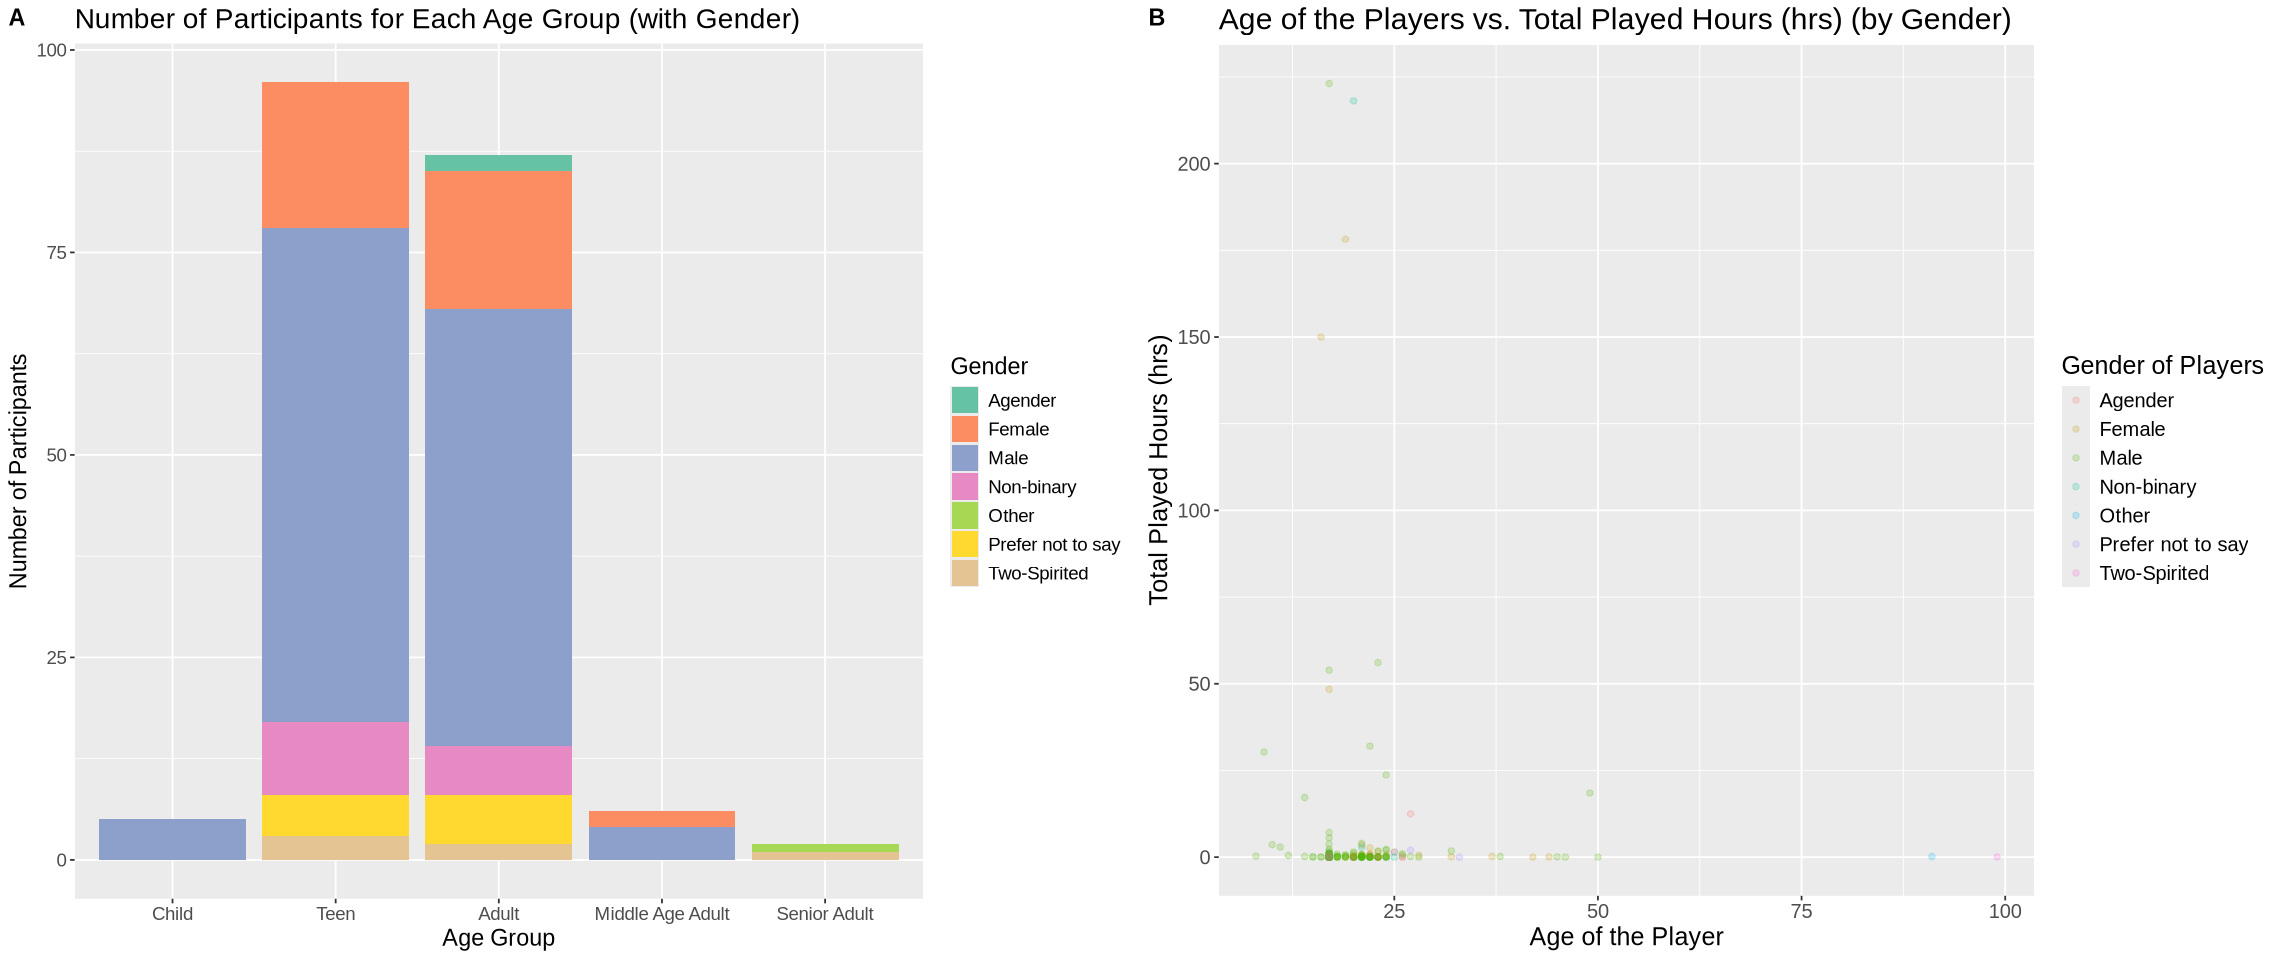

In [4]:
options(repr.plot.width = 19, repr.plot.height = 8)

# Number of observations for Each Age Group
mc_counted <- mc_grouped |>
    group_by(age_group, gender) |>
    summarize(count = n())
head(mc_counted, 5) # this is just to shorten the preview data

# !!! NOTE: Stack is used to show the number of participants, BUT also the proportion of gender in each Age Group
count_plot <- mc_counted |>
    ggplot(aes(x = age_group, y = count, fill = gender)) +
    geom_bar(stat = "identity",
            position = "stack") +
    labs(x = "Age Group",
         y = "Number of Participants",
        fill = "Gender",
        title = "Number of Participants for Each Age Group (with Gender)") +
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 14))

grouped_plot <- mc_grouped |>
    ggplot(aes(x = age, y = played_hours, color = gender)) +
    geom_point(alpha = 0.2) +
    labs(x = "Age of the Player",
         y = "Total Played Hours (hrs)",
         color = "Gender of Players",
        title = "Age of the Players vs. Total Played Hours (hrs) (by Gender)") +
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 15))

plot_grid(count_plot, grouped_plot, labels = "AUTO")